# US SEX CRIMES
##### An investigation on household composition types and reported sex crimes in nine US cities


## 1.0 Geometries
### Extracting city boundaries and census block groups

### Data Sources
##### City Boundaries
##### Baltimore: https://data.baltimorecity.gov/Neighborhoods/Neighborhoods/5cni-ybar 
##### Chicago: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk 
##### DC: https://opendata.dc.gov/datasets/washington-dc-boundary
##### Detroit: https://data.detroitmi.gov/datasets/city-of-detroit-boundary
##### LA: https://data.lacity.org/A-Livable-and-Sustainable-City/City-Boundary-of-Los-Angeles/ppge-zfr4
##### Minneapolis: http://opendata.minneapolismn.gov/datasets/city-boundary
##### Nashville: https://data.nashville.gov/General-Government/Service-Districts-GIS-/xxxs-vvs4
##### Philadelphia: https://www.opendataphilly.org/dataset/city-limits
##### SF: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h

##### Census Block Groups
#### All cities: https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t


##### Process:
###### 1. Read in city boundary data and census block group data for each city
###### 2. Keep only census block group data that falls within each city boundary for each city
###### 3. Write each disolved ('clipped') census block group dataset for each city to a shp and export to interim/geographies/

In [1]:
# Call libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [2]:
# Change working directory to a specified directory
os.chdir('../')
print("Directory Changes")

# Get current working directory
cwd = os.getcwd()
print("Current working directory is:", cwd)

Directory Changes
Current working directory is: C:\Users\Carol\Documents\CUSP\US_SexCrime


### 1.1 Read City Boundary Data & Census Block Group Data

In [3]:
# Read in city boundary data and change project tio EPSG: 4326
# Baltimore
baltimore = gpd.read_file('data/raw/geographies/Baltimore/neighborhoods/geo_export_8f31f489-1b51-49bd-bd3a-3e191b148e4f.shp')
baltimore = baltimore.to_crs({'init' : 'epsg:4326'})

# Chicago
chicago = gpd.read_file('data/raw/geographies/Chicago/city_boundary/geo_export_fda6bfb4-4abf-4190-ab64-3b14820d16ed.shp')
chicago = chicago.to_crs({'init' : 'epsg:4326'})

# DC
dc = gpd.read_file('data/raw/geographies/DC/city_boundary/Washington_DC_Boundary.shp')
dc = dc.to_crs({'init' : 'epsg:4326'})

# Detroit
detroit = gpd.read_file('data/raw/geographies/Detroit/city_boundary/City_of_Detroit_Boundary.shp')
detroit = detroit.to_crs({'init' : 'epsg:4326'})

# LA
la = gpd.read_file('data/raw/geographies/LA/city_boundary/geo_export_50e9d8b1-ae5f-4b93-8f62-13a65efda243.shp')
la = la.to_crs({'init' : 'epsg:4326'})

# Minneapolis
minneapolis = gpd.read_file('data/raw/geographies/Minneapolis/city_boundary/msvcGIS_MinneapolisCityLimits.shp')
minneapolis = minneapolis.to_crs({'init' : 'epsg:4326'})

# Nashville
nashville = gpd.read_file('data/raw/geographies/Nashville/city_boundary/geo_export_ecfd10c4-7943-4819-a261-6c9b4590ed0c.shp')
nashville = nashville.to_crs({'init' : 'epsg:4326'})

# Philadelphia
philadelphia = gpd.read_file('data/raw/geographies/Philadelphia/city_boundary/City_Limits.shp')
philadelphia = philadelphia.to_crs({'init' : 'epsg:4326'})

# SF
sf = gpd.read_file('data/raw/geographies/SF/neighborhoods/geo_export_39403b81-ecfa-4d81-ba51-aa3a9db97625.shp')
sf = sf.to_crs({'init' : 'epsg:4326'})

C:\Users\Carol\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
# Read in census block group data per city and change projection to EPSG: 4326

# No County (Independent); Baltimore
independent_baltimore_bg = gpd.read_file('data/raw/geographies/Baltimore/census_bg/15000.shp')
independent_baltimore_bg = independent_baltimore_bg.to_crs({'init' : 'epsg:4326'})

# Cook county; Chicago
cook_county_bg = gpd.read_file('data/raw/geographies/Chicago/census_bg/15000.shp')
cook_county_bg = cook_county_bg.to_crs({'init' : 'epsg:4326'})

# No County (Independent); DC
independent_dc_bg = gpd.read_file('data/raw/geographies/DC/census_bg/15000.shp')
independent_dc_bg = independent_dc_bg.to_crs({'init' : 'epsg:4326'})

# Wayne county; Detroit
wayne_county_bg = gpd.read_file('data/raw/geographies/Detroit/census_bg/15000.shp')
wayne_county_bg = wayne_county_bg.to_crs({'init' : 'epsg:4326'})

# Los Angeles county; LA
losangeles_county_bg = gpd.read_file('data/raw/geographies/LA/census_bg/15000.shp')
losangeles_county_bg = losangeles_county_bg.to_crs({'init' : 'epsg:4326'})

# Hennepin county; Minneapolis
hennepin_county_bg = gpd.read_file('data/raw/geographies/Minneapolis/census_bg/15000.shp')
hennepin_county_bg = hennepin_county_bg.to_crs({'init' : 'epsg:4326'})

# Davidson county; Nashiville
davidson_county_bg = gpd.read_file('data/raw/geographies/Nashville/census_bg/15000.shp')
davidson_county_bg = davidson_county_bg.to_crs({'init' : 'epsg:4326'})

#Philadelphia county; Philadelphia
philadelpiha_county_bg = gpd.read_file('data/raw/geographies/Philadelphia/census_bg/15000.shp')
philadelpiha_county_bg = philadelpiha_county_bg.to_crs({'init' : 'epsg:4326'})

# San Francisco county; SF
sanfrancisco_county_bg = gpd.read_file('data/raw/geographies/SF/census_bg/15000.shp')
sanfrancisco_county_bg = sanfrancisco_county_bg.to_crs({'init' : 'epsg:4326'})

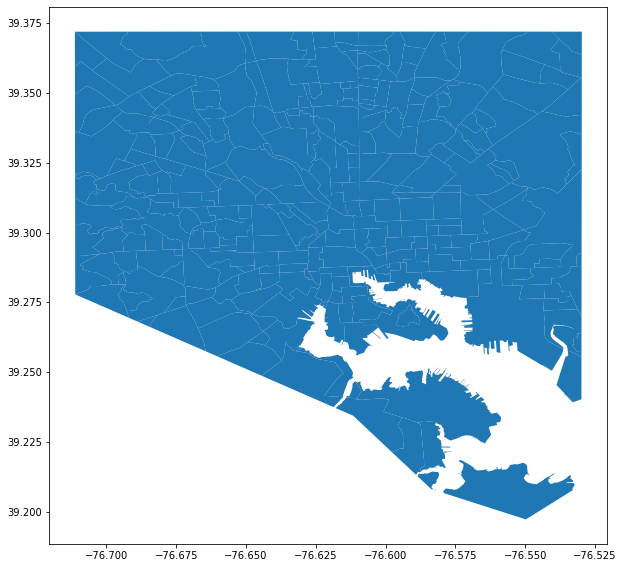

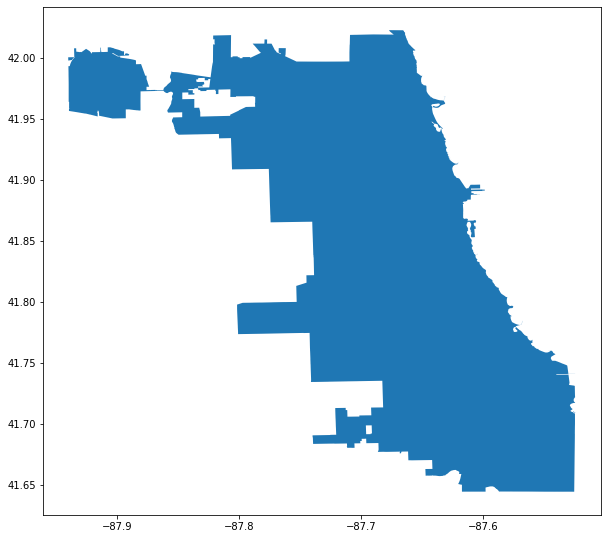

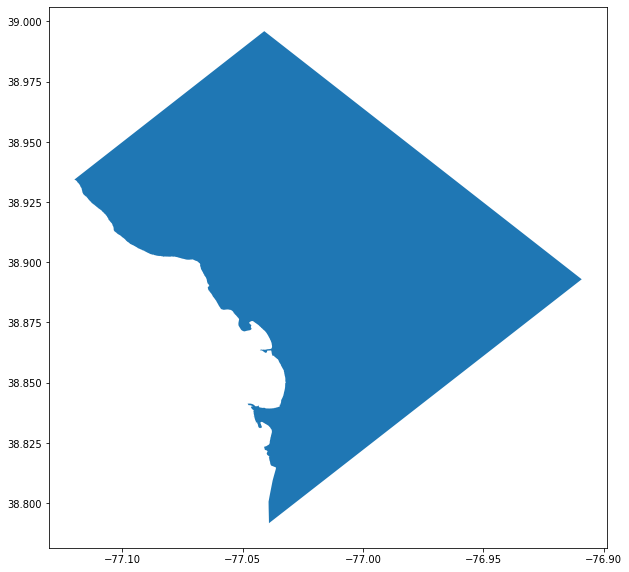

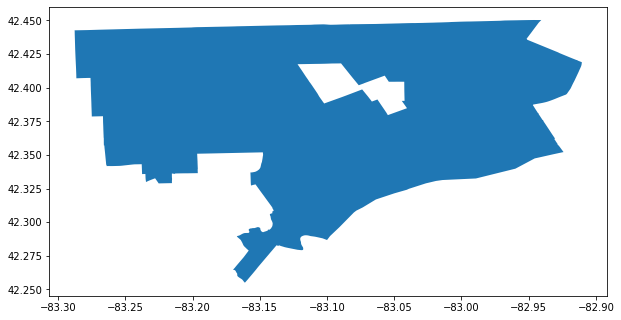

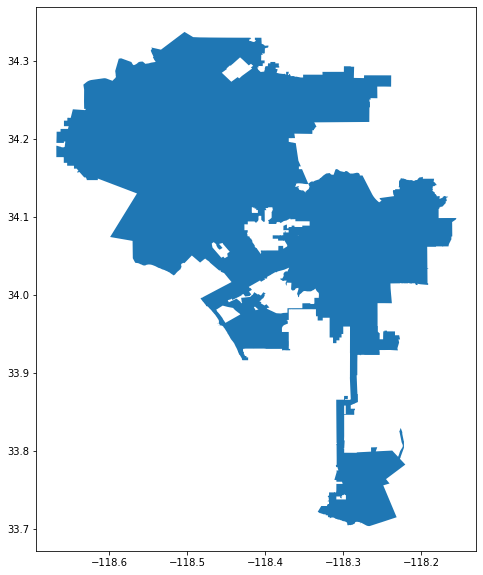

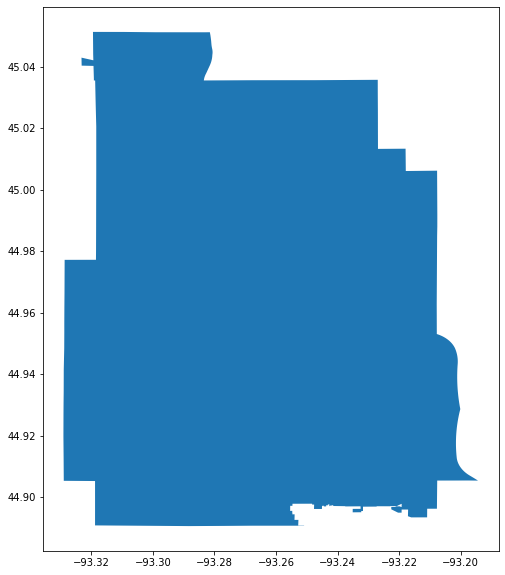

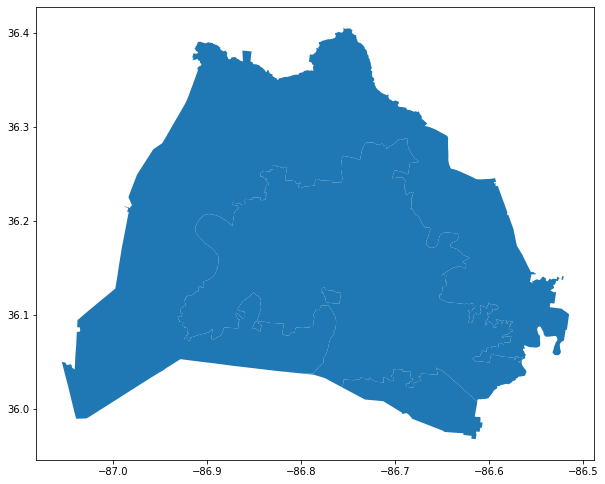

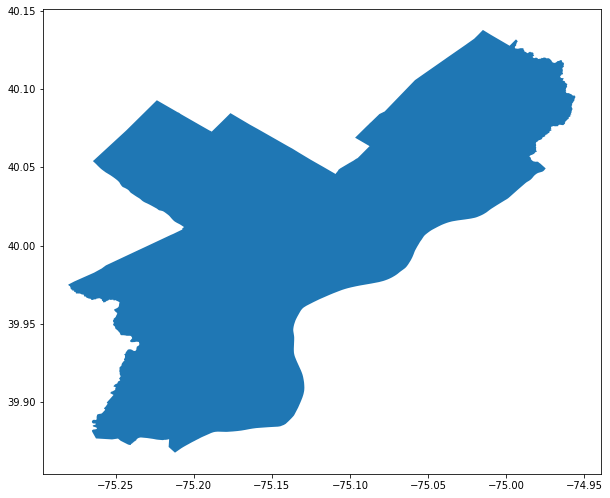

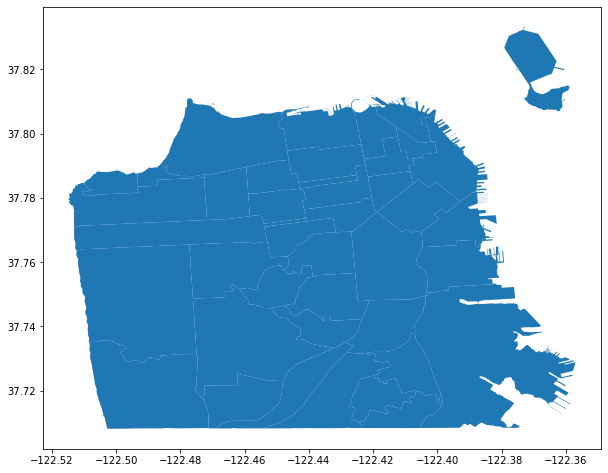

In [5]:
# Plot city boundaries for visual inspection of data
baltimore.plot(figsize=(10,10))
chicago.plot(figsize=(10,10))
dc.plot(figsize=(10,10))
detroit.plot(figsize=(10,10))
la.plot(figsize=(10,10))
minneapolis.plot(figsize=(10,10))
nashville.plot(figsize=(10,10))
philadelphia.plot(figsize=(10,10))
sf.plot(figsize=(10,10))

### 1.2 Keeping only census block group data that falls within each city boundary per city

In [6]:
# Check shape per city (want 1 row - i.e. 1 geometry - for each)
#baltimore.shape
#chicago.shape
#dc.shape
#detroit.shape
#la.shape
#minneapolis.shape
#nashville.shape
#philadelphia.shape
#sf.shape

# nasvhille = 2 rows
# sf = 41 rows

In [7]:
# Have to dissolve cities with city boundary that has more than 1 row to ensure that clip works successfully (i.e. gives us only 1 geometry)

# Function to dissolve to obtain city boundaries
def get_citybounds(city = None):
    
    '''Dissolves city neighborhoods into one boundary polygon'''
    # Make dummy column to dissolve on
    city['dummy'] = 1
    # Dissolve on 'dummy'
    city = city.dissolve(by='dummy')
    # Set city to EPSG 4326 crs
    city = city.to_crs({'init' :'epsg:4326'})
    
    return city

In [8]:
# Obtain city boundaries
# Baltimore
baltimore_cb = get_citybounds(baltimore)
baltimore_cb.to_file('data/interim/geographies/Baltimore/baltimore_cb.shp')

# Chicago
chicago_cb = get_citybounds(chicago)
chicago_cb.to_file('data/interim/geographies/Chicago/chicago_cb.shp')

# DC
dc_cb = get_citybounds(dc)
dc_cb.to_file('data/interim/geographies/DC/dc_cb.shp')
                     
# Detroit
detroit_cb = get_citybounds(detroit)
detroit_cb.to_file('data/interim/geographies/Detroit/detroit_cb.shp')
                    
# LA
la_cb = get_citybounds(la)
la_cb.to_file('data/interim/geographies/LA/la_cb.shp')

# Minneapolis
minneapolis_cb = get_citybounds(minneapolis)
minneapolis_cb.to_file('data/interim/geographies/Minneapolis/minneapolis_cb.shp')

# Nashville
nashville_cb = get_citybounds(nashville)
nashville_cb.to_file('data/interim/geographies/Nashville/nashville_cb.shp')
                     
# Philadelphia
philadelphia_cb = get_citybounds(philadelphia)
philadelphia_cb.to_file('data/interim/geographies/Philadelphia/philadelphia_cb.shp')

# SF
sf_cb = get_citybounds(sf)
sf_cb.to_file('data/interim/geographies/SF/sf_cb.shp')

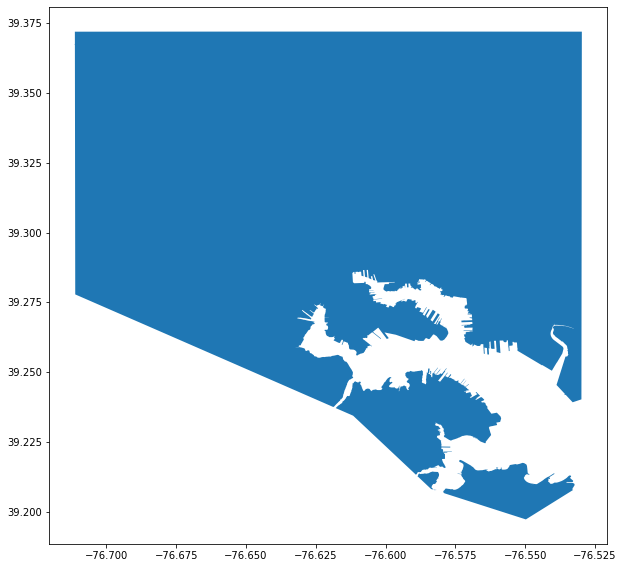

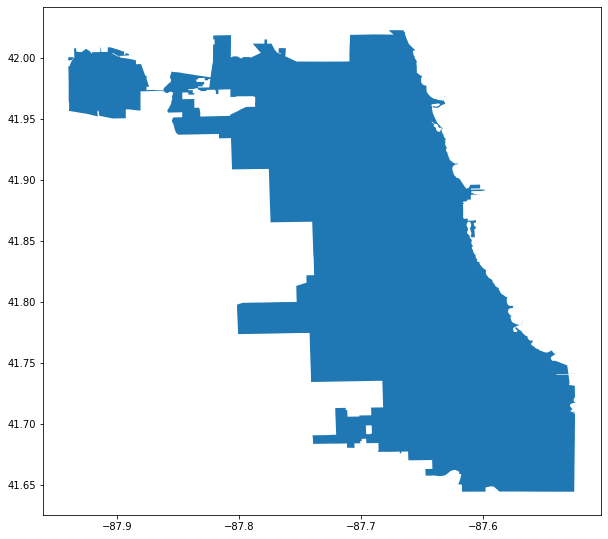

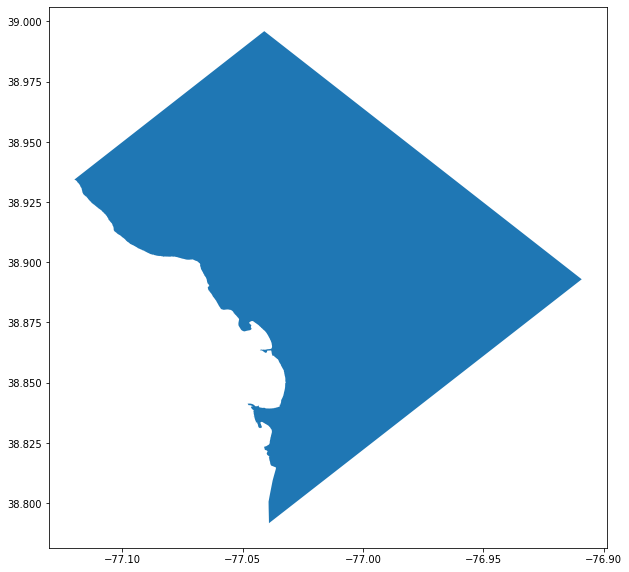

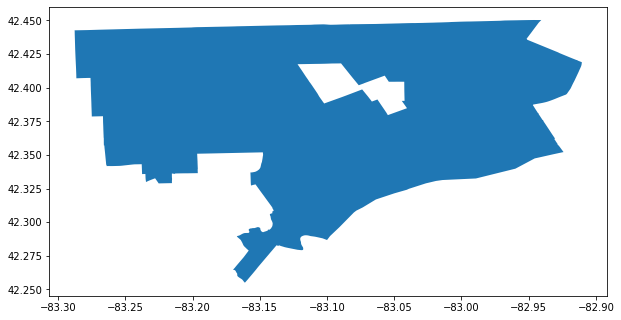

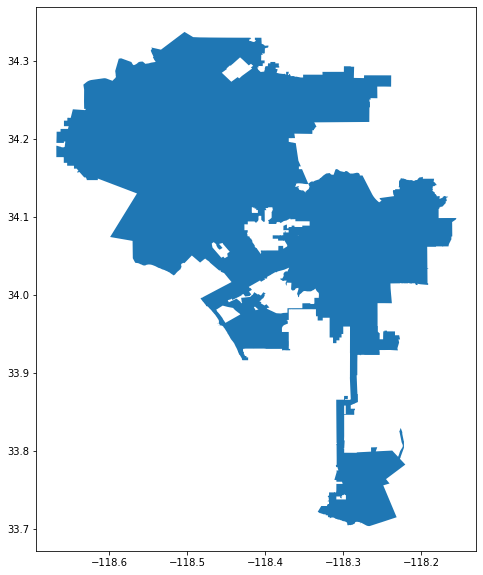

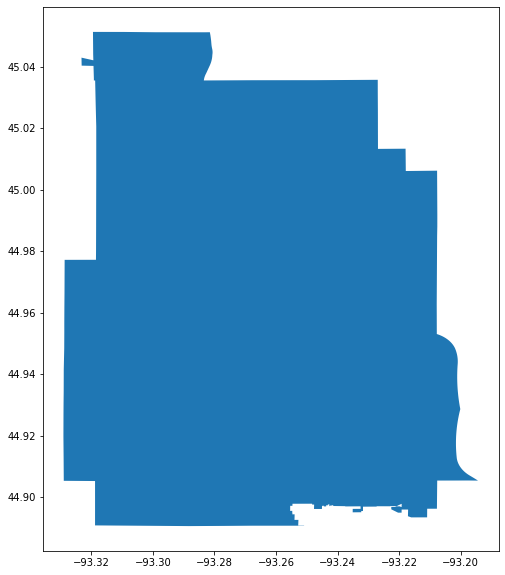

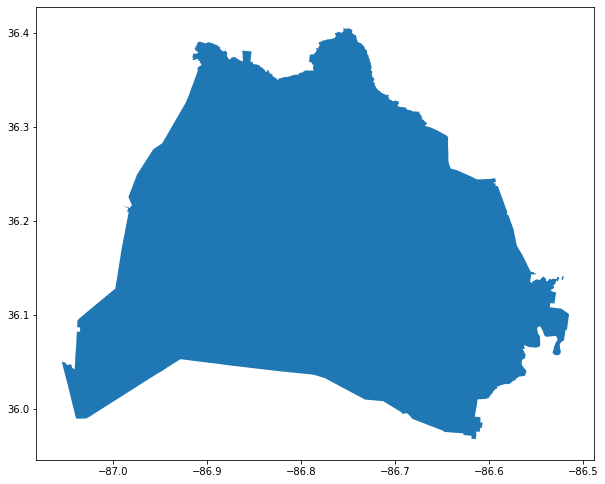

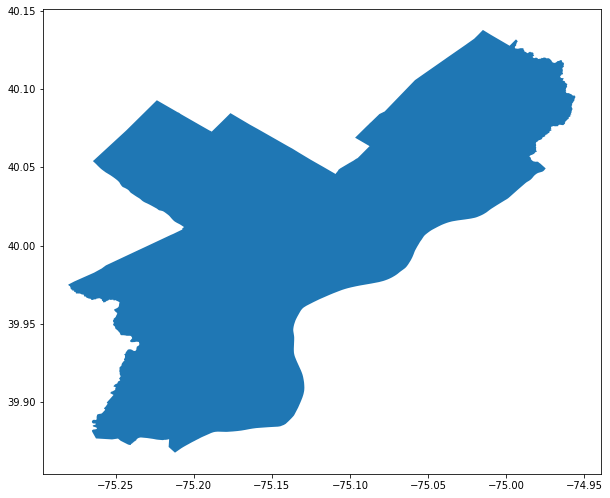

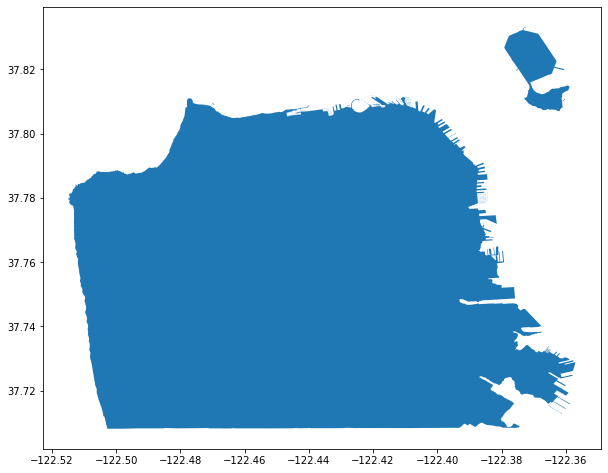

In [9]:
# Plot new city boundaries for visual inspection
baltimore_cb.plot(figsize=(10,10))
chicago_cb.plot(figsize=(10,10))
dc_cb.plot(figsize=(10,10))
detroit_cb.plot(figsize=(10,10))
la_cb.plot(figsize=(10,10))
minneapolis_cb.plot(figsize=(10,10))
nashville_cb.plot(figsize=(10,10))
philadelphia_cb.plot(figsize=(10,10))
sf_cb.plot(figsize=(10,10))

### 1.3 Write & Export Census Block Groups Data

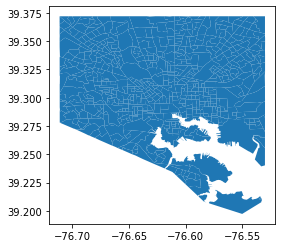

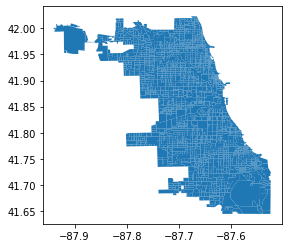

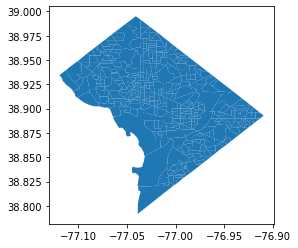

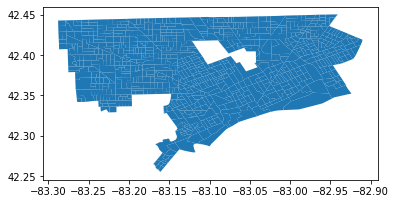

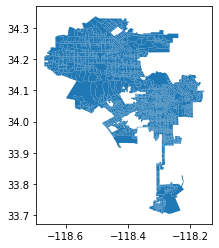

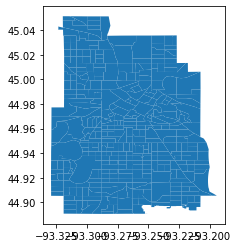

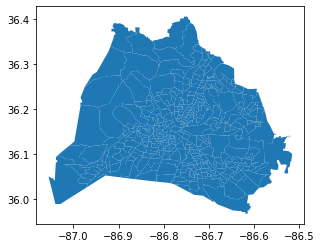

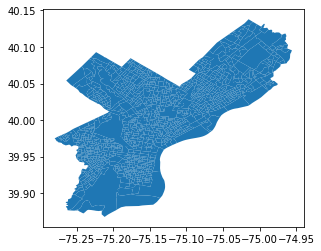

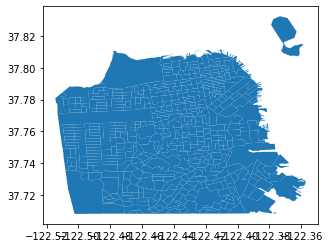

In [14]:
# Overlay (i.e. "clip") census block groups that only fall within each city's city boundary and write each output to interim census data per city

# Baltimore
baltimore_bg = gpd.overlay(independent_baltimore_bg, baltimore_cb, how='intersection')
baltimore_bg.to_file('data/interim/census/Baltimore/baltimore_bg.shp')
baltimore_bg.plot()

# Chicago
chicago_bg = gpd.overlay(cook_county_bg, chicago_cb, how='intersection')
chicago_bg.to_file('data/interim/census/Chicago/chicago_bg.shp')
chicago_bg.plot()

# DC
dc_bg = gpd.overlay(independent_dc_bg, dc_cb, how='intersection')
dc_bg.to_file('data/interim/census/DC/dc_bg.shp')
dc_bg.plot()

# Detroit
detroit_bg = gpd.overlay(wayne_county_bg, detroit_cb, how='intersection')
detroit_bg.to_file('data/interim/census/Detroit/detroit_bg.shp')
detroit_bg.plot()

# LA
la_bg = gpd.overlay(losangeles_county_bg, la_cb, how='intersection')
la_bg.to_file('data/interim/census/LA/la_bg.shp')
la_bg.plot()

# Minneapolis
minneapolis_bg = gpd.overlay(hennepin_county_bg, minneapolis_cb, how='intersection')
minneapolis_bg.to_file('data/interim/census/Minneapolis/minneapolis_bg.shp')
minneapolis_bg.plot()

# Nashville
nashville_bg = gpd.overlay(davidson_county_bg, nashville_cb, how='intersection')
nashville_bg.to_file('data/interim/census/Nashville/nashville_bg.shp')
nashville_bg.plot()

# Philadelphia
philadelphia_bg = gpd.overlay(philadelpiha_county_bg, philadelphia_cb, how='intersection')
philadelphia_bg.to_file('data/interim/census/Philadelphia/philadelphia_bg.shp')
philadelphia_bg.plot()

# SF
sf_bg = gpd.overlay(sanfrancisco_county_bg, sf_cb, how='intersection')
sf_bg.to_file('data/interim/census/SF/sf_bg.shp')
sf_bg.plot()